<a href="https://colab.research.google.com/github/yuhui-0611/ESAA/blob/main/ESAA_1st_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

< DATA INTRODUCTION >

- 포르투갈 금융 기관의 직접 마케팅 캠페인 데이터
- 인구통계학적 정보, 재무 특성, 보유 금융상품, 고객 행동 이력, 마케팅 접촉 기록 등의 변수
- 목적
> 고객 프로필 분석 & 타깃 변수인 TERMDEPOSITSUBSCRIBED를 활용하여 고객의 정기예금 가입 여부 예측

# DATA

- 본 데이터셋은 '가입하지 않음'의 비중이 매우 높은 불균형 데이터(Class Imbalance)
- 단순히 다수 클래스를 맞히는 정확도(Accuracy)보다는, 실제 가입 고객을 얼마나 놓치지 않고(Recall) 정확하게(Precision) 예측했는지를 종합적으로 평가하기 위해 F1-Score를 사용

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('/content/drive/MyDrive/ESAA/train_bank.csv')
test = pd.read_csv('/content/drive/MyDrive/ESAA/test_bank.csv')
sub = pd.read_csv('/content/drive/MyDrive/ESAA/sample_submission_bank.csv')

# 결측 확인

In [4]:
train.head()

,ClientID,Age,Gender,MaritalStatus,EducationLevel,EmploymentStatus,JobTitle,Region,SalaryCategory,CustomerSegment,...,LastContactDuration,NumContactsInCampaign,NumPrevCampaignContacts,PrevCampaignOutcome,CallResponseScore,DaysSinceLastContact,PreviousYearDeposit,MarketingScore,ResponsePropensity,TermDepositSubscribed
0,72795,38,Female,Single,Secondary,Employed,Management,Central,UpperMid,Mass,...,110,3,2,Failure,21.42,554,0,1.5197,0.22,1
1,73315,60,Female,Single,Primary,Employed,Self-employed,South,Mid,Mass,...,573,1,4,Success,34.87,7,0,1.7134,0.14,0
2,9033,46,Female,Single,Tertiary,Student,Management,South,UpperMid,Mass,...,276,3,0,Nonexistent,21.99,-1,0,1.6688,0.51,1
3,37828,52,Male,Single,Primary,Self-employed,Technician,Central,Low,Mass,...,257,2,0,Nonexistent,25.89,-1,0,1.4821,0.24,0
4,48444,18,Male,Married,Secondary,Employed,Blue-collar,East,Low,Mass,...,84,2,1,Failure,28.78,187,0,1.3320,0.15,0


In [5]:
train.columns

Index(['ClientID', 'Age', 'Gender', 'MaritalStatus', 'EducationLevel',
       'EmploymentStatus', 'JobTitle', 'Region', 'SalaryCategory',
       'CustomerSegment', 'AnnualIncome', 'NetWorth', 'CreditScore',
       'CreditLimit', 'RiskRating', 'AccountLengthYears', 'TenureWithBank',
       'AccountBalance', 'NumBankProducts', 'HasCreditCard', 'HasMortgage',
       'HasPersonalLoan', 'HasLifeInsurance', 'HasMutualFunds',
       'InvestmentPortfolioValue', 'TotalTransactions', 'AvgTransactionValue',
       'NumOnlineTransactions', 'NumMobileAppLogins', 'BranchVisitFrequency',
       'ChannelPreference', 'WebsiteActivityScore', 'LastContactChannel',
       'LastContactMonth', 'LastContactDay', 'LastContactDuration',
       'NumContactsInCampaign', 'NumPrevCampaignContacts',
       'PrevCampaignOutcome', 'CallResponseScore', 'DaysSinceLastContact',
       'PreviousYearDeposit', 'MarketingScore', 'ResponsePropensity',
       'TermDepositSubscribed'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientID                  70000 non-null  int64  
 1   Age                       70000 non-null  int64  
 2   Gender                    70000 non-null  object 
 3   MaritalStatus             70000 non-null  object 
 4   EducationLevel            70000 non-null  object 
 5   EmploymentStatus          70000 non-null  object 
 6   JobTitle                  70000 non-null  object 
 7   Region                    70000 non-null  object 
 8   SalaryCategory            70000 non-null  object 
 9   CustomerSegment           70000 non-null  object 
 10  AnnualIncome              70000 non-null  float64
 11  NetWorth                  70000 non-null  float64
 12  CreditScore               69510 non-null  float64
 13  CreditLimit               70000 non-null  float64
 14  RiskRa

In [10]:
train.isna().sum()

,0
ClientID,0
Age,0
Gender,0
MaritalStatus,0
EducationLevel,0
EmploymentStatus,0
JobTitle,0
Region,0
SalaryCategory,0
CustomerSegment,0


- CreditScore
- AccountLengthYears
- TenureWithBank
- InvestmentPortfolioValue
- CallResponseScore
- MarketingScore
- ResponsePropensity

| 변수                       | 성격        |
| ------------------------ | --------- |
| CreditScore              | 신용도 지표    |
| AccountLengthYears       | 계좌 유지 기간  |
| TenureWithBank           | 은행 거래 기간  |
| InvestmentPortfolioValue | 투자 자산 규모  |
| CallResponseScore        | 전화 반응 점수  |
| MarketingScore           | 마케팅 타깃 점수 |
| ResponsePropensity       | 가입 가능성 점수 |


**약한 관계 변수는 단독 성능이 아니라 ‘다른 변수들과 함께’ 예측력을 만들고, 불균형 데이터에서는 작은 신호의 누적이 F1에 크게 기여할 수 있어서 정보 보존이 중요**

### CreditScore

In [21]:
train['CreditScore']

,CreditScore
0,648.0
1,673.0
2,595.0
3,714.0
4,588.0
...,...
69995,645.0
69996,622.0
69997,654.0
69998,569.0


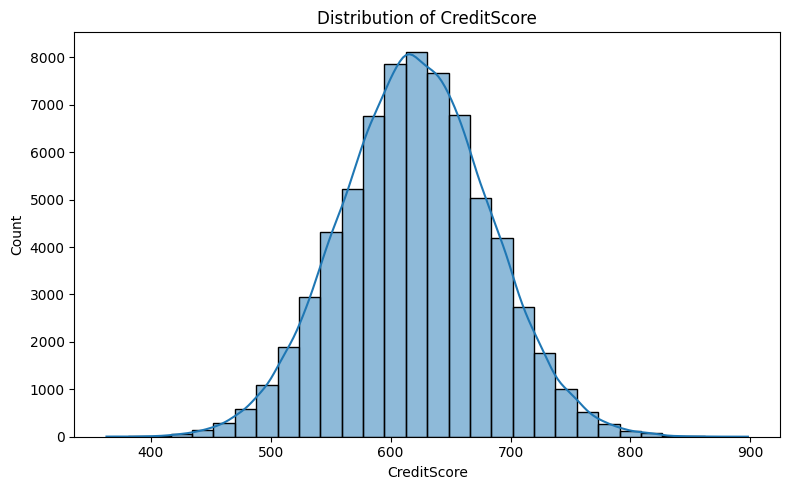

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(train['CreditScore'], bins=30, kde=True)
plt.title('Distribution of CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- 평균/중앙값이 큰 차이를 보이지 않는 안정적인 분포

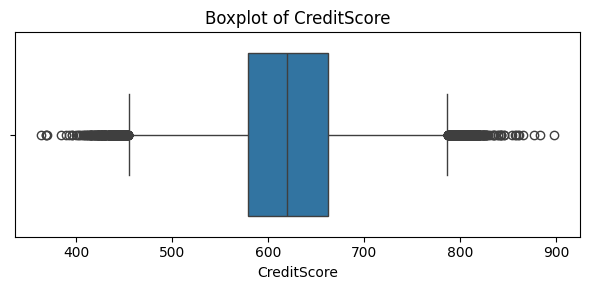

In [30]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=train['CreditScore'])
plt.title('Boxplot of CreditScore')
plt.xlabel('CreditScore')
plt.tight_layout()
plt.show()

- 신용 점수 특성상 실제 존재 가능한 이상치
> 데이터 오류로 보기 곤란 -> 이상치 제거 X

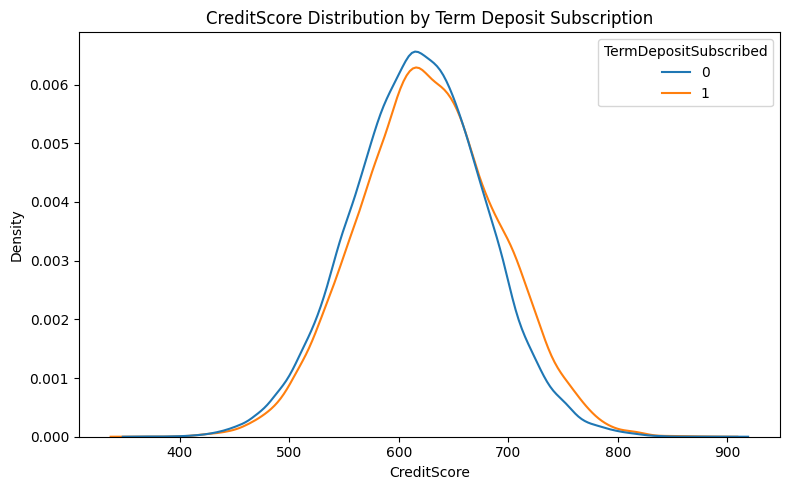

In [31]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=train,
    x='CreditScore',
    hue='TermDepositSubscribed',
    common_norm=False
)
plt.title('CreditScore Distribution by Term Deposit Subscription')
plt.xlabel('CreditScore')
plt.tight_layout()
plt.show()

TermDepositSubscribed = 1 (가입자)

TermDepositSubscribed = 0 (비가입자)

- creditscore 대비 termdepositsubscribed 차이가 크지 X : 타깃과 약한 관계 존재 → 정보 보존이 중요
- 분포가 대체로 대칭 → 중앙값 안정적
- 이상치 영향 최소화
- “신용점수 정보가 없는 고객” 자체가 의미를 가질 수 있음
> 최적 선택: 중앙값(Median) 대치 + 결측 Indicator

금융 데이터에서 신용 점수의 결측은 가입 행동과 연관될 수 있음

단순히 값만 채우는 것이 아니라, CreditScore_missing 같은 indicator를 추가하면 모델이 "값의 크기” + “값이 존재하는지 여부”를 동시에 학습
> 결측 여부를 나타내는 이진 indicator 변수 추가

### AccountLengthYears

In [23]:
train['AccountLengthYears']

,AccountLengthYears
0,6.0
1,5.0
2,0.0
3,11.0
4,2.0
...,...
69995,0.0
69996,4.0
69997,NaN
69998,8.0


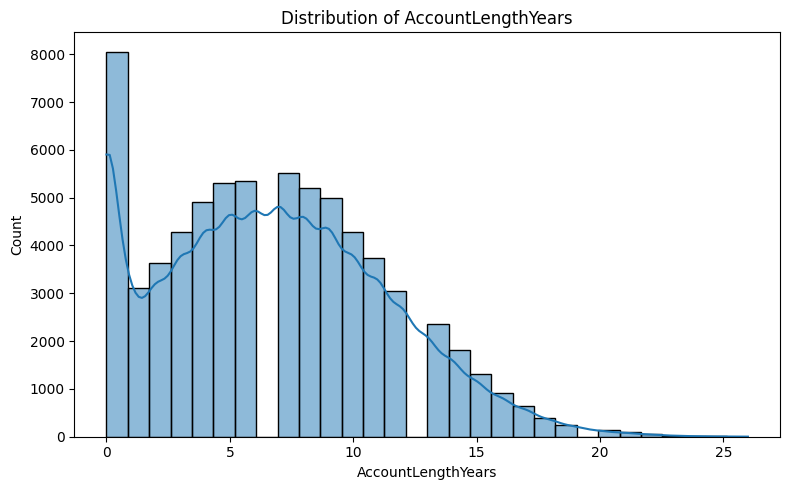

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(train['AccountLengthYears'], bins=30, kde=True)
plt.title('Distribution of AccountLengthYears')
plt.xlabel('AccountLengthYears')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- right-skewed 분포
- 신규 고객 + 장기 고객 혼재

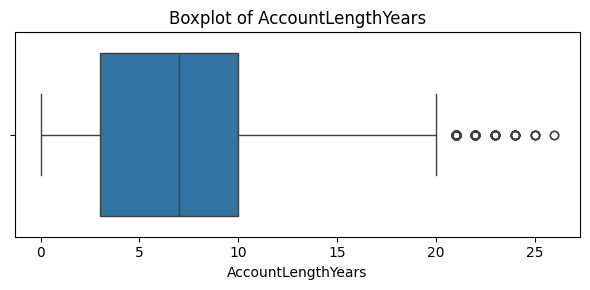

In [33]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=train['AccountLengthYears'])
plt.title('Boxplot of AccountLengthYears')
plt.xlabel('AccountLengthYears')
plt.tight_layout()
plt.show()

- 20~25년대 값들이 이상치
- 장기 거래 고객으로 현실적으로 충분히 가능한 값
> 이상치 제거 X

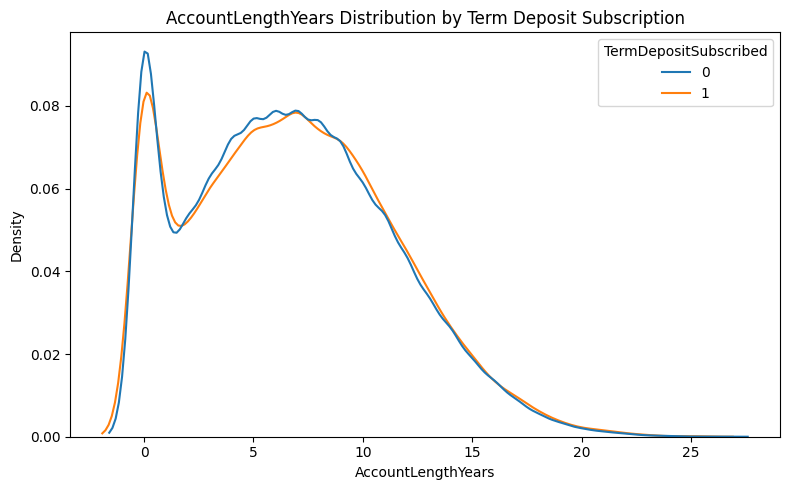

In [34]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=train,
    x='AccountLengthYears',
    hue='TermDepositSubscribed',
    common_norm=False
)
plt.title('AccountLengthYears Distribution by Term Deposit Subscription')
plt.xlabel('AccountLengthYears')
plt.tight_layout()
plt.show()

- 이상치 제거 X
- 대신, 이상치 영향 최소화를 위해 median으로 대체
- creditscore처럼 계좌 유지기간 결측 자체로서 의미를 지니기에 indicator 추가

### TenureWithBank

In [24]:
train['TenureWithBank']

,TenureWithBank
0,6.0
1,5.0
2,12.0
3,13.0
4,2.0
...,...
69995,1.0
69996,7.0
69997,11.0
69998,8.0


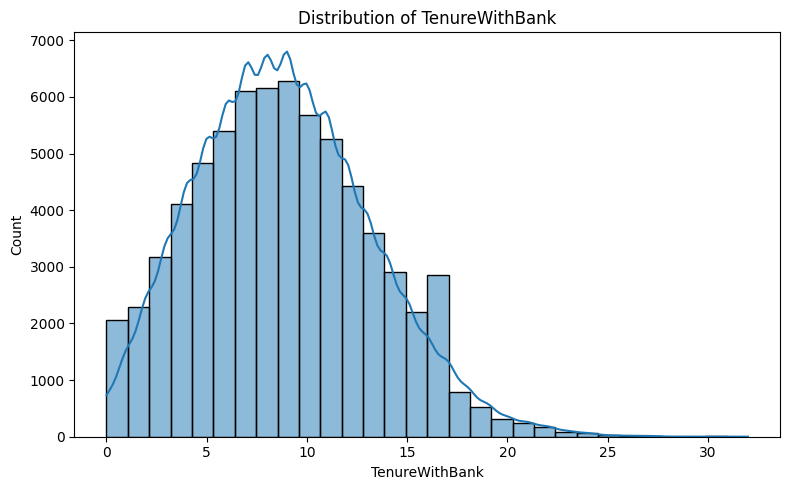

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(train['TenureWithBank'], bins=30, kde=True)
plt.title('Distribution of TenureWithBank')
plt.xlabel('TenureWithBank')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

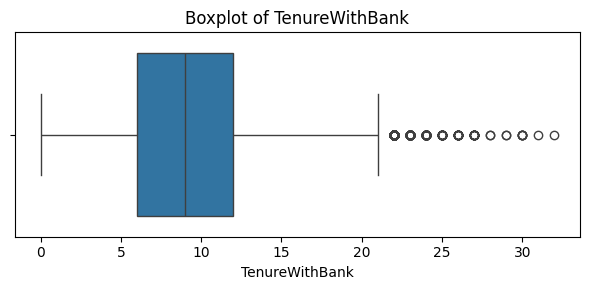

In [38]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=train['TenureWithBank'])
plt.title('Boxplot of TenureWithBank')
plt.xlabel('TenureWithBank')
plt.tight_layout()
plt.show()

- 20~30년대 값들이 이상치
- 장기 우량 고객으로 충분히 현실적인 값 -> 장기 거래 자체가 중요한 정보일 수 있음
> 이상치 제거 X

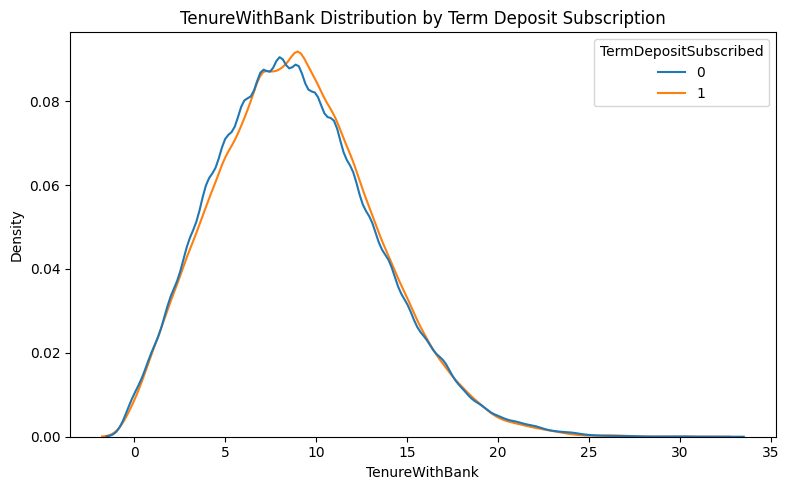

In [39]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=train,
    x='TenureWithBank',
    hue='TermDepositSubscribed',
    common_norm=False
)
plt.title('TenureWithBank Distribution by Term Deposit Subscription')
plt.xlabel('TenureWithBank')
plt.tight_layout()
plt.show()

- 위 두 변수처럼, 이 변수 또한 같은 이유로
> 중앙값 대치 + 결측 indicator

### InvestmentPortfolioValue

In [25]:
train['InvestmentPortfolioValue']

,InvestmentPortfolioValue
0,25845.78
1,37169.43
2,53681.14
3,16436.40
4,8132.50
...,...
69995,154178.96
69996,17914.62
69997,21665.53
69998,16580.80


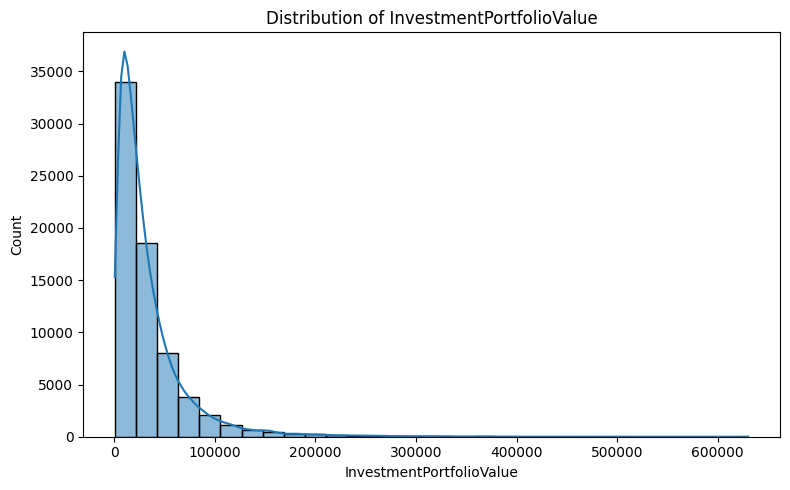

In [40]:
plt.figure(figsize=(8, 5))
sns.histplot(train['InvestmentPortfolioValue'], bins=30, kde=True)
plt.title('Distribution of InvestmentPortfolioValue')
plt.xlabel('InvestmentPortfolioValue')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- right-skewed
- 소수의 고객이 수십만 ~ 60만 이상의 매우 큰 값 보유

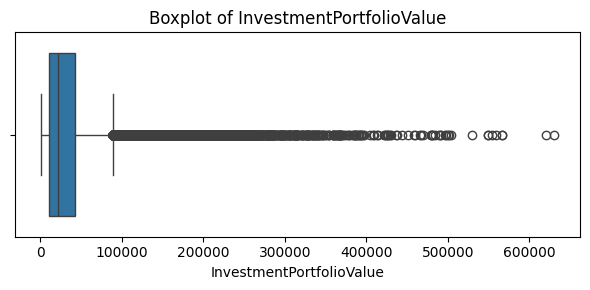

In [41]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=train['InvestmentPortfolioValue'])
plt.title('Boxplot of InvestmentPortfolioValue')
plt.xlabel('InvestmentPortfolioValue')
plt.tight_layout()
plt.show()

- 오른쪽으로 압도적으로 많은 이상치
- 고액 투자 고객은 금융 데이터에서 핵심 정보

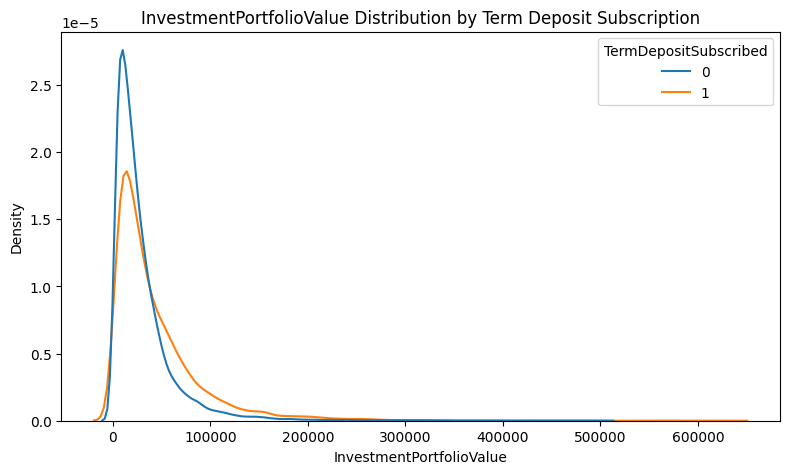

In [42]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=train,
    x='InvestmentPortfolioValue',
    hue='TermDepositSubscribed',
    common_norm=False
)
plt.title('InvestmentPortfolioValue Distribution by Term Deposit Subscription')
plt.xlabel('InvestmentPortfolioValue')
plt.tight_layout()
plt.show()

- 고액 자산 고객일수록 정기예금 가입 가능성 ↑

scale이 매우 크고, 분포가 극단적으로 비대칭이며, 값의 “존재 여부”와 “크기” 모두 의미 있음
> 결측 indicator 생성 + 중앙값 대치 + 로그 변환

### CallResponseScore

In [28]:
train['CallResponseScore']

,CallResponseScore
0,21.42
1,34.87
2,21.99
3,25.89
4,28.78
...,...
69995,22.48
69996,17.22
69997,25.80
69998,23.69


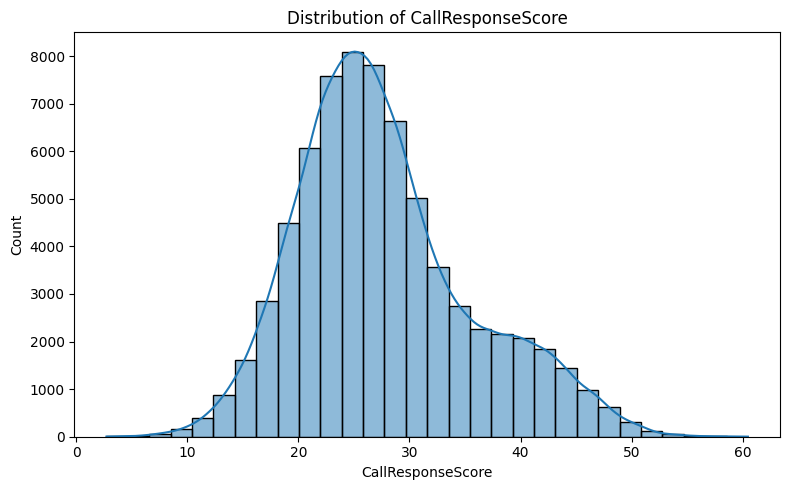

In [43]:
plt.figure(figsize=(8, 5))
sns.histplot(train['CallResponseScore'], bins=30, kde=True)
plt.title('Distribution of CallResponseScore')
plt.xlabel('CallResponseScore')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

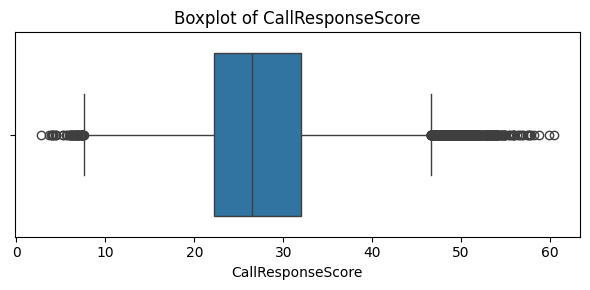

In [44]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=train['CallResponseScore'])
plt.title('Boxplot of CallResponseScore')
plt.xlabel('CallResponseScore')
plt.tight_layout()
plt.show()

- 하단(0 ~ 10), 상단(45 ~ 60) 구간에 이상치
- 콜 반응 점수라는 성격상 “매우 반응이 나쁜 고객 / 매우 반응이 좋은 고객” → 현실적으로 충분히 가능한 값
> 이상치 제거 X

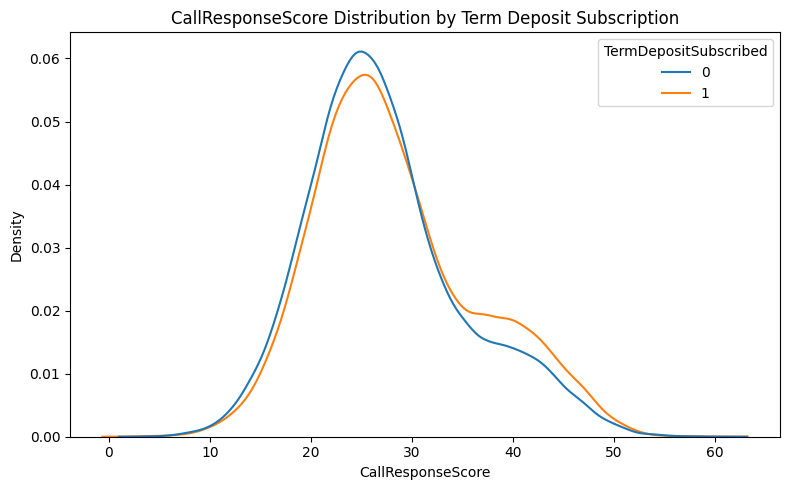

In [45]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=train,
    x='CallResponseScore',
    hue='TermDepositSubscribed',
    common_norm=False
)
plt.title('CallResponseScore Distribution by Term Deposit Subscription')
plt.xlabel('CallResponseScore')
plt.tight_layout()
plt.show()

- 가입자(1)의 분포가: 오른쪽 꼬리에서 확실히 더 두꺼우며, 35~45 구간에서 밀도가 눈에 띄게 높음

중앙값 대치로만 끝내면 안되며, 사용하고자 할 때에는, indicator을 꼭 추가해야 함

- 해당 변수는 정기 예금 가입 여부와 시간적으로 거의 동시에 혹은 이후에 생성되었을 가능성이 높음
> 가입 예측이 아닌, 결과를 설명하는 꼴이 될 수도 있음

**이 변수는 버리는 게 나을지도?**

### MarketingScore

In [27]:
train['MarketingScore']

,MarketingScore
0,1.5197
1,1.7134
2,1.6688
3,1.4821
4,1.3320
...,...
69995,1.7063
69996,1.2888
69997,1.6704
69998,1.1924


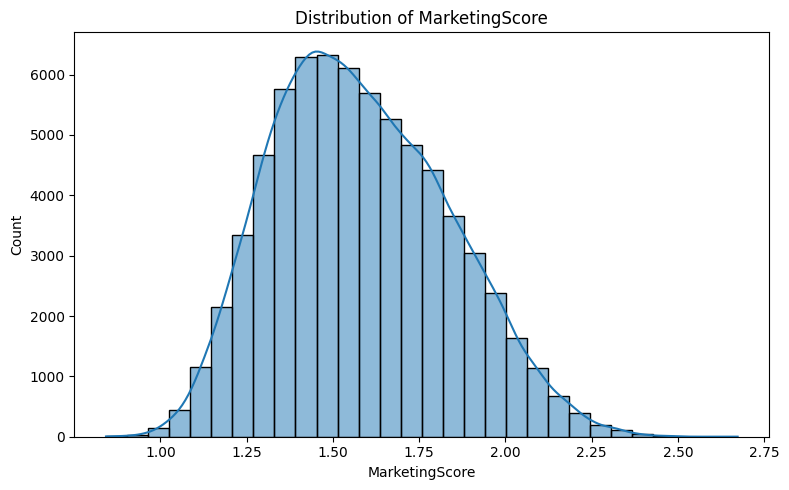

In [46]:
plt.figure(figsize=(8, 5))
sns.histplot(train['MarketingScore'], bins=30, kde=True)
plt.title('Distribution of MarketingScore')
plt.xlabel('MarketingScore')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

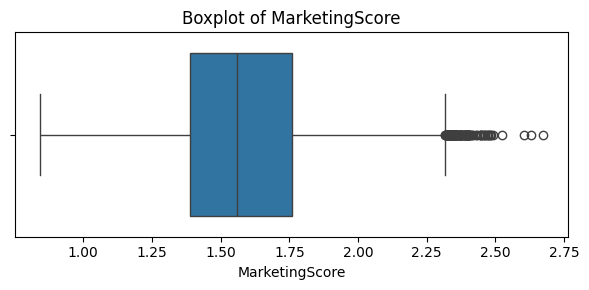

In [47]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=train['MarketingScore'])
plt.title('Boxplot of MarketingScore')
plt.xlabel('MarketingScore')
plt.tight_layout()
plt.show()

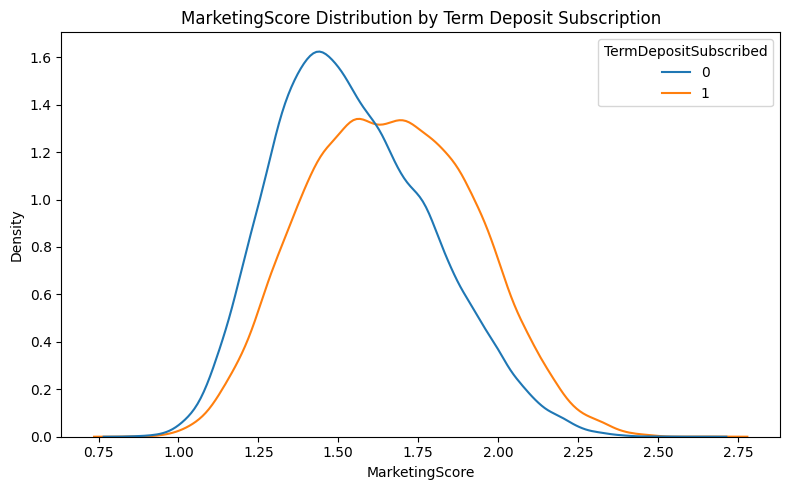

In [48]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=train,
    x='MarketingScore',
    hue='TermDepositSubscribed',
    common_norm=False
)
plt.title('MarketingScore Distribution by Term Deposit Subscription')
plt.xlabel('MarketingScore')
plt.tight_layout()
plt.show()

- 마케팅 타깃 점수는 일반적으로 고객 속성, 행동 이력, 과거 반응 등이 반영된 것
> 타깃 누수

**이 변수도 그냥 버리는 게 좋을 듯**

### ResponsePropensity

In [26]:
train['ResponsePropensity']

,ResponsePropensity
0,0.22
1,0.14
2,0.51
3,0.24
4,0.15
...,...
69995,0.34
69996,0.15
69997,0.21
69998,0.07


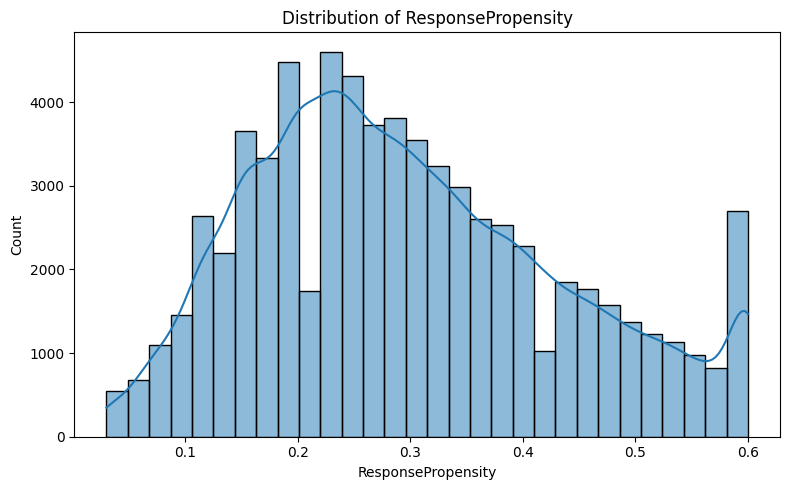

In [49]:
plt.figure(figsize=(8, 5))
sns.histplot(train['ResponsePropensity'], bins=30, kde=True)
plt.title('Distribution of ResponsePropensity')
plt.xlabel('ResponsePropensity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

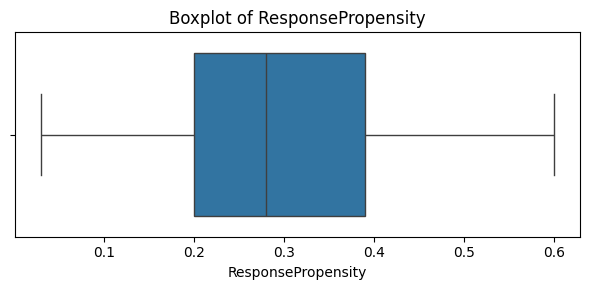

In [50]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=train['ResponsePropensity'])
plt.title('Boxplot of ResponsePropensity')
plt.xlabel('ResponsePropensity')
plt.tight_layout()
plt.show()

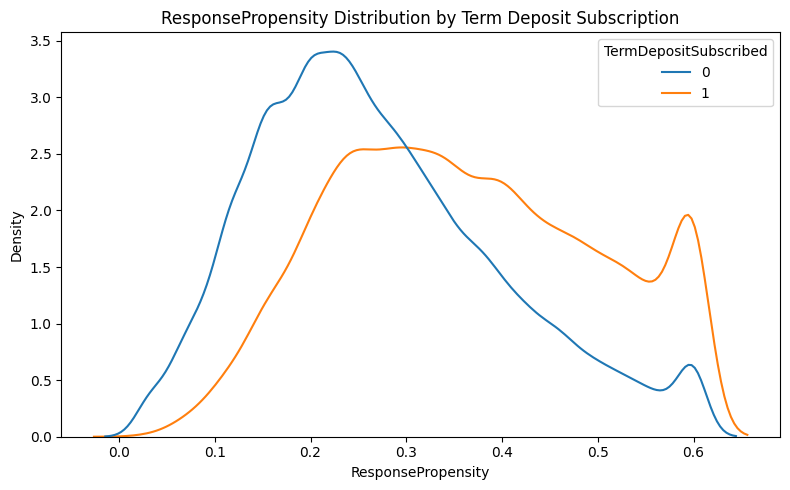

In [51]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=train,
    x='ResponsePropensity',
    hue='TermDepositSubscribed',
    common_norm=False
)
plt.title('ResponsePropensity Distribution by Term Deposit Subscription')
plt.xlabel('ResponsePropensity')
plt.tight_layout()
plt.show()

변수 자체 문제

은행이 이미 계산한 점수

버리자

# 변수 처리

- 중앙값으로 처리

In [93]:
tr = pd.read_csv('/content/drive/MyDrive/ESAA/preprocessed_train_object.csv')
ts = pd.read_csv('/content/drive/MyDrive/ESAA/preprocessed_test_object.csv')

    """
    지정한 수치형 컬럼들에 대해
    1) 결측 여부 indicator 생성
    2) 전역 중앙값(median)으로 결측 대치

    Parameters
    ----------
    df : pandas.DataFrame
        원본 데이터프레임
    cols : list
        결측 처리를 할 컬럼 리스트

    Returns
    -------
    df_imputed : pandas.DataFrame
        결측 처리된 데이터프레임
    """

In [94]:
def median_impute_with_indicator(df, cols):

    df = df.copy()

    for col in cols:
        # 결측 indicator 생성
        df[f'{col}_missing'] = df[col].isnull().astype(int)

        # 중앙값 계산
        median_value = df[col].median()

        # 중앙값으로 결측 대치
        df[col] = df[col].fillna(median_value)

    return df

In [95]:
missing_cols = [
    'CreditScore',
    'AccountLengthYears',
    'TenureWithBank',
    'InvestmentPortfolioValue',
    'CallResponseScore',
    'MarketingScore'
]

In [96]:
tr = median_impute_with_indicator(tr, missing_cols)

In [100]:
tr['InvestmentPortfolioValue_log'] = np.log1p(tr['InvestmentPortfolioValue'])

In [101]:
# 결측이 진짜 사라졌는지
tr[missing_cols].isnull().sum()

,0
CreditScore,0
AccountLengthYears,0
TenureWithBank,0
InvestmentPortfolioValue,0
CallResponseScore,0
MarketingScore,0


In [102]:
# indicator가 제대로 생성됐는지
[col for col in tr.columns if col.endswith('_missing')]

['CreditScore_missing',
 'AccountLengthYears_missing',
 'TenureWithBank_missing',
 'InvestmentPortfolioValue_missing',
 'CallResponseScore_missing',
 'MarketingScore_missing']

In [103]:
tr.columns

Index(['Age', 'Gender', 'MaritalStatus', 'EducationLevel', 'EmploymentStatus',
       'JobTitle', 'Region', 'SalaryCategory', 'CustomerSegment',
       'AnnualIncome', 'NetWorth', 'CreditScore', 'CreditLimit', 'RiskRating',
       'AccountLengthYears', 'TenureWithBank', 'AccountBalance',
       'NumBankProducts', 'HasCreditCard', 'HasMortgage', 'HasPersonalLoan',
       'HasLifeInsurance', 'HasMutualFunds', 'InvestmentPortfolioValue',
       'TotalTransactions', 'AvgTransactionValue', 'NumOnlineTransactions',
       'NumMobileAppLogins', 'BranchVisitFrequency', 'ChannelPreference',
       'WebsiteActivityScore', 'LastContactChannel', 'LastContactMonth',
       'LastContactDay', 'LastContactDuration', 'NumContactsInCampaign',
       'NumPrevCampaignContacts', 'PrevCampaignOutcome', 'CallResponseScore',
       'DaysSinceLastContact', 'PreviousYearDeposit', 'MarketingScore',
       'ResponsePropensity', 'Is_New_Customer', 'TermDepositSubscribed',
       'CreditScore_missing', 'AccountLeng

In [105]:
# 기준 학습
def fit_median_imputer(df, cols):
    medians = {}
    for col in cols:
        medians[col] = df[col].median()
    return medians

# 적용
def apply_median_imputer(df, cols, medians):
    df = df.copy()
    for col in cols:
        df[f'{col}_missing'] = df[col].isnull().astype(int)
        df[col] = df[col].fillna(medians[col])
    return df

In [106]:
# 1. train 기준 학습
median_dict = fit_median_imputer(tr, missing_cols)

# 2. test 적용 (같은 기준)
ts = apply_median_imputer(ts, missing_cols, median_dict)
ts['InvestmentPortfolioValue_log'] = np.log1p(ts['InvestmentPortfolioValue'])

In [118]:
drop_cols = [
    'ResponsePropensity'
]

In [119]:
tr = tr.drop(columns=drop_cols)
ts = ts.drop(columns=drop_cols)

In [108]:
from google.colab import files

In [120]:
# train 저장
tr.to_csv('train_final.csv', index=False)

# test 저장
ts.to_csv('test_final.csv', index=False)

files.download('train_final.csv')
files.download('test_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 모델

In [121]:
X = tr.drop(columns=['TermDepositSubscribed'])
y = tr['TermDepositSubscribed']

In [122]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [124]:
for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
    X_valid[col] = X_valid[col].astype('category')

In [125]:
import lightgbm as lgb
from sklearn.metrics import f1_score

model = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight='balanced',
    random_state=42
)

In [126]:
model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric='f1',
    categorical_feature=categorical_cols,
    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=True)]
)

[LightGBM] [Info] Number of positive: 16812, number of negative: 39188
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4262
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid_0's binary_logloss: 0.630459


LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
               learning_rate=0.05, n_estimators=500, objective='binary',
               random_state=42, subsample=0.8)

In [127]:
y_pred = model.predict(X_valid)
f1 = f1_score(y_valid, y_pred)

print(f'Validation F1-score: {f1:.4f}')

Validation F1-score: 0.5001


In [128]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importance.head(15)

,feature,importance
11,CreditScore,843
34,LastContactDuration,843
38,CallResponseScore,797
30,WebsiteActivityScore,749
27,NumMobileAppLogins,718
23,InvestmentPortfolioValue,695
16,AccountBalance,692
25,AvgTransactionValue,686
41,MarketingScore,679
10,NetWorth,676


In [130]:
drop_cols_add = [
    'CallResponseScore',
    'MarketingScore'
]

tr_add = tr.drop(columns=drop_cols_add)
ts_add = ts.drop(columns=drop_cols_add)

In [131]:
X = tr_add.drop(columns=['TermDepositSubscribed'])
y = tr_add['TermDepositSubscribed']

categorical_cols = X.select_dtypes(include='object').columns.tolist()

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
    X_valid[col] = X_valid[col].astype('category')

model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric='f1',
    categorical_feature=categorical_cols,
    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=True)]
)

y_pred = model.predict(X_valid)
f1 = f1_score(y_valid, y_pred)

print(f'Validation F1-score: {f1:.4f}')

[LightGBM] [Info] Number of positive: 16812, number of negative: 39188
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3752
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid_0's binary_logloss: 0.628
Validation F1-score: 0.5013


# 파생변수 데이터로 catboost

In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
tr_cat = pd.read_csv('/content/drive/MyDrive/ESAA/train_f.csv')
ts_cat = pd.read_csv('/content/drive/MyDrive/ESAA/test_f.csv')

In [132]:
!pip install catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [147]:
tr_cat.columns

Index(['Age', 'Gender', 'MaritalStatus', 'EducationLevel', 'EmploymentStatus',
       'JobTitle', 'Region', 'SalaryCategory', 'CustomerSegment',
       'AnnualIncome', 'NetWorth', 'CreditScore', 'CreditLimit', 'RiskRating',
       'AccountLengthYears', 'TenureWithBank', 'AccountBalance',
       'NumBankProducts', 'HasCreditCard', 'HasMortgage', 'HasPersonalLoan',
       'HasLifeInsurance', 'HasMutualFunds', 'InvestmentPortfolioValue',
       'TotalTransactions', 'AvgTransactionValue', 'NumOnlineTransactions',
       'NumMobileAppLogins', 'BranchVisitFrequency', 'ChannelPreference',
       'WebsiteActivityScore', 'LastContactChannel', 'LastContactMonth',
       'LastContactDay', 'LastContactDuration', 'NumContactsInCampaign',
       'NumPrevCampaignContacts', 'PrevCampaignOutcome', 'CallResponseScore',
       'DaysSinceLastContact', 'PreviousYearDeposit', 'MarketingScore',
       'Is_New_Customer', 'TermDepositSubscribed', 'CreditScore_missing',
       'AccountLengthYears_missing', 'Ten

In [148]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [149]:
# =========================
# 1) 데이터/타깃 분리
# =========================
TARGET = "TermDepositSubscribed"

X = tr_cat.drop(columns=[TARGET])
y = tr_cat[TARGET].astype(int)

X_test = ts_cat.copy()

In [150]:
# =========================
# 2) 범주형 컬럼 지정 (object/category)
#    CatBoost는 문자열/카테고리 그대로가 좋음
# =========================
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

# =========================
# 3) Train/Valid split (stratify 필수)
# =========================
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

train_pool = Pool(X_train, y_train, cat_features=cat_cols)
valid_pool = Pool(X_valid, y_valid, cat_features=cat_cols)

In [151]:
# =========================
# 4) CatBoost 모델
#    - auto_class_weights='Balanced'로 불균형 대응
#    - eval_metric='F1' 가능
# =========================
model = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="F1",
    iterations=8000,
    learning_rate=0.03,
    depth=6,
    l2_leaf_reg=5,
    random_seed=42,
    auto_class_weights="Balanced",
    verbose=200
)

model.fit(
    train_pool,
    eval_set=valid_pool,
    use_best_model=True,
    early_stopping_rounds=300
)

0:	learn: 0.6175400	test: 0.6074102	best: 0.6074102 (0)	total: 36.9ms	remaining: 4m 55s
200:	learn: 0.6332800	test: 0.6246743	best: 0.6254711 (199)	total: 8.7s	remaining: 5m 37s
400:	learn: 0.6476101	test: 0.6278700	best: 0.6286727 (392)	total: 15.1s	remaining: 4m 46s
600:	learn: 0.6654134	test: 0.6283437	best: 0.6304920 (441)	total: 23.6s	remaining: 4m 50s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.63049202
bestIteration = 441

Shrink model to first 442 iterations.


In [152]:
# =========================
# 5) Valid 예측 + threshold 최적화
# =========================
proba_valid = model.predict_proba(valid_pool)[:, 1]

# (1) 기본 0.5
pred_05 = (proba_valid >= 0.5).astype(int)
f1_05 = f1_score(y_valid, pred_05)
print(f"[Valid] F1 @ 0.50 = {f1_05:.4f}")

# (2) threshold 탐색 (촘촘하게)
thresholds = np.linspace(0.05, 0.95, 181)
f1s = [f1_score(y_valid, (proba_valid >= t).astype(int)) for t in thresholds]
best_t = thresholds[int(np.argmax(f1s))]
best_f1 = float(np.max(f1s))

print(f"[Valid] Best threshold = {best_t:.3f}")
print(f"[Valid] Best F1 = {best_f1:.4f}")

# 추가로 혼동행렬/리포트 보고 싶으면
pred_best = (proba_valid >= best_t).astype(int)
print("\nConfusion matrix (best threshold):")
print(confusion_matrix(y_valid, pred_best))
print("\nClassification report (best threshold):")
print(classification_report(y_valid, pred_best, digits=4))

[Valid] F1 @ 0.50 = 0.5115
[Valid] Best threshold = 0.420
[Valid] Best F1 = 0.5141

Confusion matrix (best threshold):
[[4557 5240]
 [ 936 3267]]

Classification report (best threshold):
              precision    recall  f1-score   support

           0     0.8296    0.4651    0.5961      9797
           1     0.3840    0.7773    0.5141      4203

    accuracy                         0.5589     14000
   macro avg     0.6068    0.6212    0.5551     14000
weighted avg     0.6958    0.5589    0.5715     14000



In [141]:
# =========================
# 6) Test 예측 (best threshold 적용)
# =========================
test_pool = Pool(X_test, cat_features=cat_cols)
proba_test = model.predict_proba(test_pool)[:, 1]
y_test_pred = (proba_test >= best_t).astype(int)

< 변수 제거한 거 >

In [153]:
train_cat = pd.read_csv('/content/drive/MyDrive/ESAA/train_f.csv')
test_cat = pd.read_csv('/content/drive/MyDrive/ESAA/test_f.csv')

In [154]:
X = train_cat.drop(columns=['TermDepositSubscribed'])
y = train_cat['TermDepositSubscribed']

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [155]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()

class_weights = [1, neg / pos]

In [156]:
cb = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='F1',
    class_weights=class_weights,
    random_seed=42,
    verbose=100,
    early_stopping_rounds=100
)

cb.fit(
    X_train, y_train,
    eval_set=(X_val, y_val)
)

0:	learn: 0.6175400	test: 0.6074102	best: 0.6074102 (0)	total: 96.2ms	remaining: 1m 36s
100:	learn: 0.6314419	test: 0.6223461	best: 0.6223461 (100)	total: 5.9s	remaining: 52.5s
200:	learn: 0.6418944	test: 0.6288633	best: 0.6293529 (192)	total: 10.1s	remaining: 40.1s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6293528683
bestIteration = 192

Shrink model to first 193 iterations.


In [159]:
train_pool = Pool(X_train, y_train)

importances = cb.get_feature_importance(
    data=train_pool,
    type='LossFunctionChange'
)

fi = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

fi.head(10)

,feature,importance
2,MaritalStatus,0.004196
17,NumBankProducts,0.002164
3,EducationLevel,0.001882
11,CreditScore,0.001729
31,LastContactChannel,0.001603
21,HasLifeInsurance,0.001226
68,HighEducationFlag,0.001202
41,MarketingScore,0.001172
29,ChannelPreference,0.001131
20,HasPersonalLoan,0.001069


In [160]:
fi.describe()

n_zero_or_neg = (fi["importance"] <= 0).sum()
n_total = len(fi)
print("importance <= 0 개수:", n_zero_or_neg, "/", n_total)

fi.tail(20)  # 꼴찌 20개 확인 (여기 상호작용 변수가 많이 깔려있을 확률 큼)

importance <= 0 개수: 5 / 72


,feature,importance
6,Region,0.000130
14,AccountLengthYears,0.000121
30,WebsiteActivityScore,0.000121
70,Education_x_Balance,0.000113
16,AccountBalance,0.000097
28,BranchVisitFrequency,0.000096
19,HasMortgage,0.000094
53,CreditLimit_to_Balance,0.000085
36,NumPrevCampaignContacts,0.000082
33,LastContactDay,0.000069


In [161]:
selected_features = fi.loc[fi["importance"] > 0, "feature"].tolist()
removed_features = fi.loc[fi["importance"] <= 0, "feature"].tolist()

print("남기는 feature 수:", len(selected_features))
print("제거 feature 수:", len(removed_features))
print("제거 예시:", removed_features[:20])


남기는 feature 수: 67
제거 feature 수: 5
제거 예시: ['CallResponseScore_missing', 'MarketingScore_missing', 'Is_New_Customer', 'AccountLengthYears_missing', 'RecentContactFlag']


In [162]:
X_train_pruned = X_train[selected_features]
X_val_pruned   = X_val[selected_features]

cb_pruned = CatBoostClassifier(
    iterations=2000,
    learning_rate=0.05,
    depth=6,
    loss_function="Logloss",
    eval_metric="F1",
    class_weights=class_weights,
    random_seed=42,
    verbose=200,
    early_stopping_rounds=200
)

cb_pruned.fit(X_train_pruned, y_train, eval_set=(X_val_pruned, y_val))


0:	learn: 0.6135669	test: 0.6056922	best: 0.6056922 (0)	total: 121ms	remaining: 4m 2s
200:	learn: 0.6424919	test: 0.6273176	best: 0.6273959 (188)	total: 8.63s	remaining: 1m 17s
400:	learn: 0.6707261	test: 0.6253294	best: 0.6277159 (205)	total: 23.6s	remaining: 1m 34s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.6277158537
bestIteration = 205

Shrink model to first 206 iterations.


In [163]:
proba = cb_pruned.predict_proba(X_val_pruned)[:, 1]
thresholds = np.linspace(0.01, 0.99, 300)

f1_scores = [f1_score(y_val, proba > t) for t in thresholds]
best_idx = int(np.argmax(f1_scores))

best_t = float(thresholds[best_idx])
best_f1 = float(f1_scores[best_idx])

print("Best threshold:", best_t)
print("Best F1:", best_f1)

Best threshold: 0.42297658862876253
Best F1: 0.5138108428967155


In [164]:
def train_eval_with_topk(topk_ratio):
    topk = int(len(fi) * topk_ratio)
    feats = fi.iloc[:topk]["feature"].tolist()

    Xtr = X_train[feats]
    Xva = X_val[feats]

    model = CatBoostClassifier(
        iterations=2000,
        learning_rate=0.05,
        depth=6,
        loss_function="Logloss",
        eval_metric="F1",
        class_weights=class_weights,
        random_seed=42,
        verbose=False,
        early_stopping_rounds=200
    )
    model.fit(Xtr, y_train, eval_set=(Xva, y_val), verbose=False)

    proba = model.predict_proba(Xva)[:, 1]
    thresholds = np.linspace(0.01, 0.99, 300)
    f1s = [f1_score(y_val, proba > t) for t in thresholds]
    best_i = int(np.argmax(f1s))
    return {
        "topk_ratio": topk_ratio,
        "n_features": len(feats),
        "best_f1": float(f1s[best_i]),
        "best_threshold": float(thresholds[best_i])
    }

ratios = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5]
results = [train_eval_with_topk(r) for r in ratios]

res_df = pd.DataFrame(results).sort_values("best_f1", ascending=False)
res_df

,topk_ratio,n_features,best_f1,best_threshold
4,0.6,43,0.514564,0.419699
1,0.9,64,0.514452,0.452475
0,1.0,72,0.514240,0.462308
3,0.7,50,0.513989,0.413144
2,0.8,57,0.513584,0.413144
5,0.5,36,0.512989,0.445920


In [165]:
proba

array([0.68777179, 0.63591807, 0.59529069, ..., 0.39789412, 0.41199579,
       0.32957086])

In [176]:
X_train_pruned = X_train[selected_features]
X_val_pruned   = X_val[selected_features]

cb_pruned = CatBoostClassifier(
    iterations=3000,
    learning_rate=0.03,
    depth=7,
    loss_function="Logloss",
    eval_metric="F1",
    class_weights=[1, (neg / pos) * 1.2],
    random_seed=42,
    verbose=200,
    early_stopping_rounds=200
)

cb_pruned.fit(X_train_pruned, y_train, eval_set=(X_val_pruned, y_val))


0:	learn: 0.6569080	test: 0.6508952	best: 0.6508952 (0)	total: 118ms	remaining: 5m 52s
200:	learn: 0.6966403	test: 0.6755842	best: 0.6764713 (129)	total: 16.4s	remaining: 3m 48s
400:	learn: 0.7153695	test: 0.6751740	best: 0.6776532 (253)	total: 26.9s	remaining: 2m 54s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.6776531516
bestIteration = 253

Shrink model to first 254 iterations.


In [177]:
proba = cb_pruned.predict_proba(X_val_pruned)[:, 1]
thresholds = np.linspace(0.01, 0.99, 300)

f1_scores = [f1_score(y_val, proba > t) for t in thresholds]
best_idx = int(np.argmax(f1_scores))

best_t = float(thresholds[best_idx])
best_f1 = float(f1_scores[best_idx])

print("Best threshold:", best_t)
print("Best F1:", best_f1)

Best threshold: 0.5114715719063545
Best F1: 0.5125278644672314


# 튜닝 후 최적 cat

In [178]:
train_cat = pd.read_csv('/content/drive/MyDrive/ESAA/train_f.csv')
test_cat = pd.read_csv('/content/drive/MyDrive/ESAA/test_f.csv')

In [179]:
X = train_cat.drop(columns=['TermDepositSubscribed'])
y = train_cat['TermDepositSubscribed']

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

neg = (y_train == 0).sum()
pos = (y_train == 1).sum()

class_weights = [1, neg / pos]

cb = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='F1',
    class_weights=class_weights,
    random_seed=42,
    verbose=100,
    early_stopping_rounds=100
)

cb.fit(
    X_train, y_train,
    eval_set=(X_val, y_val)
)

train_pool = Pool(X_train, y_train)

importances = cb.get_feature_importance(
    data=train_pool,
    type='LossFunctionChange'
)

fi = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

selected_features = fi.loc[fi["importance"] > 0, "feature"].tolist()
removed_features = fi.loc[fi["importance"] <= 0, "feature"].tolist()

X_train_pruned = X_train[selected_features]
X_val_pruned   = X_val[selected_features]

cb_pruned = CatBoostClassifier(
    iterations=2000,
    learning_rate=0.05,
    depth=6,
    loss_function="Logloss",
    eval_metric="F1",
    class_weights=class_weights,
    random_seed=42,
    verbose=200,
    early_stopping_rounds=200
)

cb_pruned.fit(X_train_pruned, y_train, eval_set=(X_val_pruned, y_val))

proba = cb_pruned.predict_proba(X_val_pruned)[:, 1]
thresholds = np.linspace(0.01, 0.99, 300)

f1_scores = [f1_score(y_val, proba > t) for t in thresholds]
best_idx = int(np.argmax(f1_scores))

best_t = float(thresholds[best_idx])
best_f1 = float(f1_scores[best_idx])

print("Best threshold:", best_t)
print("Best F1:", best_f1)

0:	learn: 0.6175400	test: 0.6074102	best: 0.6074102 (0)	total: 38ms	remaining: 37.9s
100:	learn: 0.6314419	test: 0.6223461	best: 0.6223461 (100)	total: 4.56s	remaining: 40.6s
200:	learn: 0.6418944	test: 0.6288633	best: 0.6293529 (192)	total: 11.2s	remaining: 44.5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6293528683
bestIteration = 192

Shrink model to first 193 iterations.
0:	learn: 0.6135669	test: 0.6056922	best: 0.6056922 (0)	total: 37.4ms	remaining: 1m 14s
200:	learn: 0.6424919	test: 0.6273176	best: 0.6273959 (188)	total: 8.64s	remaining: 1m 17s
400:	learn: 0.6707261	test: 0.6253294	best: 0.6277159 (205)	total: 15s	remaining: 59.6s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.6277158537
bestIteration = 205

Shrink model to first 206 iterations.
Best threshold: 0.42297658862876253
Best F1: 0.5138108428967155


# 최적 lgbm

In [180]:
train_f = pd.read_csv('/content/drive/MyDrive/ESAA/train_f.csv')
test_f = pd.read_csv('/content/drive/MyDrive/ESAA/test_f.csv')

In [181]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

# 1. 학습용 변수/타겟 정의
target = "TermDepositSubscribed"
X = train_f.drop(columns=[target])
y = train_f[target]

# train/test 컬럼 맞춤
train_f, test_f = train_f.align(test_f, join="left", axis=1, fill_value=0)

# 2. LGBM 파라미터
lgb_params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "boosting_type": "gbdt",
    "learning_rate": 0.03,
    "n_estimators": 3000,
    "num_leaves": 31,
    "min_child_samples": 80,
    "subsample": 0.8,
    "subsample_freq": 1,
    "colsample_bytree": 0.8,
    "reg_alpha": 1.0,
    "reg_lambda": 1.0,
    "scale_pos_weight": 1.8,  # 불균형 대응
    "random_state": 42,
    "n_jobs": -1
}

# 3. Stratified KFold 학습
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []
best_thresholds = []
feature_importances = np.zeros(X.shape[1])

for fold, (tr_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]

    model = lgb.LGBMClassifier(**lgb_params)
    model.fit(
        X_tr, y_tr,
        eval_set=[(X_val, y_val)],
        eval_metric="binary_logloss",
        callbacks=[lgb.early_stopping(200, verbose=False)]
    )

    # 예측 확률
    val_prob = model.predict_proba(X_val)[:,1]

    # 최적 F1 threshold 탐색
    thresholds = np.arange(0.25, 0.55, 0.02)
    f1_list = [f1_score(y_val, (val_prob >= t).astype(int)) for t in thresholds]
    best_idx = np.argmax(f1_list)
    best_threshold = thresholds[best_idx]
    best_f1 = f1_list[best_idx]

    f1_scores.append(best_f1)
    best_thresholds.append(best_threshold)

    # feature importance 누적
    feature_importances += model.feature_importances_

    print(f"[Fold {fold}] Best F1: {best_f1:.4f} | Best threshold: {best_threshold:.2f}")

# 평균 F1 및 threshold
print("\nMean F1:", np.mean(f1_scores))
print("Std  F1:", np.std(f1_scores))
print("Avg threshold:", np.mean(best_thresholds))

[LightGBM] [Info] Number of positive: 16812, number of negative: 39188
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8598
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.300214 -> initscore=-0.846278
[LightGBM] [Info] Start training from score -0.846278
[Fold 1] Best F1: 0.5075 | Best threshold: 0.33
[LightGBM] [Info] Number of positive: 16812, number of negative: 39188
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8593
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.300214 -> initscore=-0.846278
[LightGBM] [Info] 

In [182]:
# CatBoost에서 쓴 split 그대로 사용: X_train, X_val, y_train, y_val
lgb_hold_params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "boosting_type": "gbdt",
    "learning_rate": 0.03,
    "n_estimators": 5000,
    "num_leaves": 31,
    "min_child_samples": 80,
    "subsample": 0.8,
    "subsample_freq": 1,
    "colsample_bytree": 0.8,
    "reg_alpha": 1.0,
    "reg_lambda": 1.0,
    "scale_pos_weight": 1.8,
    "random_state": 42,
    "n_jobs": -1
}

lgb_hold = lgb.LGBMClassifier(**lgb_hold_params)
lgb_hold.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="binary_logloss",
    callbacks=[lgb.early_stopping(200, verbose=False)]
)

proba_lgb = lgb_hold.predict_proba(X_val)[:, 1]

[LightGBM] [Info] Number of positive: 16812, number of negative: 39188
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8595
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.300214 -> initscore=-0.846278
[LightGBM] [Info] Start training from score -0.846278


In [183]:
proba_cat = cb_pruned.predict_proba(X_val_pruned)[:, 1]

# 주의: CatBoost는 pruned feature만 사용했으므로
#       LGBM도 같은 feature subset으로 맞추고 싶다면 아래처럼 맞추는 게 더 공정함
# proba_lgb = lgb_hold.predict_proba(X_val_pruned)[:, 1]

In [184]:
lgb_hold2 = lgb.LGBMClassifier(**lgb_hold_params)
lgb_hold2.fit(
    X_train_pruned, y_train,
    eval_set=[(X_val_pruned, y_val)],
    eval_metric="binary_logloss",
    callbacks=[lgb.early_stopping(200, verbose=False)]
)
proba_lgb = lgb_hold2.predict_proba(X_val_pruned)[:, 1]

[LightGBM] [Info] Number of positive: 16812, number of negative: 39188
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8591
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 67
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.300214 -> initscore=-0.846278
[LightGBM] [Info] Start training from score -0.846278


In [185]:
weights = np.linspace(0.0, 1.0, 21)   # w_cat 후보
thresholds = np.linspace(0.05, 0.95, 400)

best = None
for w_cat in weights:
    w_lgb = 1 - w_cat
    proba_ens = w_cat * proba_cat + w_lgb * proba_lgb

    f1s = [f1_score(y_val, (proba_ens >= t).astype(int)) for t in thresholds]
    i = int(np.argmax(f1s))
    res = (float(f1s[i]), float(w_cat), float(thresholds[i]))
    if best is None or res[0] > best[0]:
        best = res

best_f1_ens, best_w_cat, best_t_ens = best
print("Ensemble Best F1:", best_f1_ens)
print("Best weight (cat):", best_w_cat, "| (lgb):", 1-best_w_cat)
print("Best threshold:", best_t_ens)

Ensemble Best F1: 0.4618427558925334
Best weight (cat): 0.1 | (lgb): 0.9
Best threshold: 0.28233082706766915


# 저장

In [189]:
# =========================
# CatBoost 결과로 submission 생성
# =========================

# 1) train 전체 데이터 (pruned feature 동일)
X_full = X[selected_features]   # X = train_cat.drop(target)
y_full = y

# 2) test 데이터도 동일 feature
X_test = test_f[selected_features]

# 3) 전체 데이터 기준 class_weights 재계산
neg_full = (y_full == 0).sum()
pos_full = (y_full == 1).sum()
class_weights_full = [1, neg_full / pos_full]

# 4) 최종 CatBoost 학습
cat_final = CatBoostClassifier(
    iterations=cb_pruned.get_best_iteration() + 1,
    learning_rate=0.05,
    depth=6,
    loss_function="Logloss",
    class_weights=class_weights_full,
    random_seed=42,
    verbose=200
)

cat_final.fit(X_full, y_full)

# 5) test 확률 예측
test_proba = cat_final.predict_proba(X_test)[:, 1]

# 6) validation에서 찾은 best threshold 적용
test_pred = (test_proba >= best_t).astype(int)

# =========================
# 7) sample_submission에 값 채우기
# =========================

# 이미 읽어둔 sample submission
# sub = pd.read_csv("sample_submission_bank.csv")

sub["TermDepositSubscribed"] = test_pred

# 8) 저장
sub.to_csv("submission.csv", index=False)

print("submission.csv 저장 완료")
print(sub.head())


0:	learn: 0.6893826	total: 99.4ms	remaining: 20.4s
200:	learn: 0.6283244	total: 13.5s	remaining: 337ms
205:	learn: 0.6279655	total: 13.7s	remaining: 0us
submission.csv 저장 완료
   ClientID  TermDepositSubscribed
0     34212                      1
1     56245                      0
2     18637                      1
3     72551                      0
4     41090                      0


In [190]:
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# drop한 거 포함해서 다시

In [192]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [197]:
tr = pd.read_csv('/content/drive/MyDrive/ESAA/res 있는 파생변수 데이터/train_f (1).csv')
ts = pd.read_csv('/content/drive/MyDrive/ESAA/res 있는 파생변수 데이터/test_f (1).csv')

In [202]:
target = "TermDepositSubscribed"
X = tr.drop(columns=[target])
y = tr[target].astype(int)

# (혹시 id 같은 컬럼이 있으면 제거하고 싶다면 여기에 추가)
# drop_cols = ['id', 'ID']
# X = X.drop(columns=[c for c in drop_cols if c in X.columns])
# ts_model = ts.drop(columns=[c for c in drop_cols if c in ts.columns])
ts_model = ts.copy()

# -------------------------
# 3) train/valid split (F1 기준 평가용)
# -------------------------
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# -------------------------
# 4) 클래스 불균형 가중치 (0/1 기준)
# -------------------------
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()

# CatBoost의 class_weights는 [class0_weight, class1_weight]
# 흔한 방식: minority(1) 쪽을 더 크게
class_weights = [1.0, (neg / pos) if pos > 0 else 1.0]
print("✅ class_weights =", class_weights)

# -------------------------
# 5) 모델 학습 (eval_metric='F1', early stopping)
# -------------------------
cb = CatBoostClassifier(
    iterations=5000,
    learning_rate=0.03,
    depth=6,
    loss_function='Logloss',
    eval_metric='F1',
    class_weights=class_weights,
    random_seed=42,
    verbose=200,
    early_stopping_rounds=200,
    # task_type="GPU"  # GPU 가능하면 주석 해제
)

cb.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    use_best_model=True
)

# -------------------------
# 6) 검증 F1 확인 (0.5 기준)
# -------------------------
val_pred = cb.predict(X_val)  # CatBoost는 기본이 class 예측(0/1)
val_f1 = f1_score(y_val, val_pred)
print(f"✅ Validation F1 = {val_f1:.6f}")

# -------------------------
# 7) (선택) 임계값 튜닝으로 F1 최대화 (원하면 사용)
# -------------------------
# 기본 0.5가 아니라 threshold를 바꿔서 F1을 올릴 수도 있어요.
# 대회에서 도움이 되는 경우가 종종 있음.
proba_val = cb.predict_proba(X_val)[:, 1]
best_thr, best_f1 = 0.5, val_f1

for thr in np.linspace(0.05, 0.95, 19):
    pred_thr = (proba_val >= thr).astype(int)
    f1 = f1_score(y_val, pred_thr)
    if f1 > best_f1:
        best_f1, best_thr = f1, thr

print(f"✅ Best threshold on val = {best_thr:.2f}, Best F1 = {best_f1:.6f}")

# -------------------------
# 8) 전체 train으로 재학습 (best_iteration 활용)
# -------------------------
best_iter = cb.get_best_iteration()
print("✅ best_iteration =", best_iter)

final_cb = CatBoostClassifier(
    iterations=best_iter if best_iter is not None and best_iter > 0 else 2000,
    learning_rate=0.03,
    depth=6,
    loss_function='Logloss',
    eval_metric='F1',
    class_weights=class_weights,
    random_seed=42,
    verbose=200,
    # task_type="GPU"  # GPU 가능하면 주석 해제
)

final_cb.fit(X, y)

# -------------------------
# 9) test 예측 (threshold 적용)
# -------------------------
test_proba = final_cb.predict_proba(ts_model)[:, 1]
test_pred = (test_proba >= best_thr).astype(int)

✅ class_weights = [1.0, np.float64(2.3309540804187483)]


CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=33]="120–300s": Cannot convert '120–300s' to float